# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder, Binarizer, KBinsDiscretizer,
    MinMaxScaler, StandardScaler, PolynomialFeatures
)
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import (
    CountVectorizer, TfidfTransformer, TfidfVectorizer
)


In [2]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
countries = pd.read_csv("countries.csv")

In [4]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
countries.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_density          object
Coastline_ratio      object
Net_migration        object
Infant_mortality     object
GDP                 float64
Literacy             object
Phones_per_1000      object
Arable               object
Crops                object
Other                object
Climate              object
Birthrate            object
Deathrate            object
Agriculture          object
Industry             object
Service              object
dtype: object

In [6]:
# Transforming the string variables in a numerical ones.
# Data columns with object dtypes
object_columns = list(countries.select_dtypes(object).columns)
# Removing the REALLY object variables
object_columns.remove('Country')
object_columns.remove('Region')

# The variables to be transformed into numeric
transform_numeric= object_columns

# First, replacing the ',' with the '.'
countries[transform_numeric] = countries[transform_numeric].replace(',','.', regex=True)
countries[transform_numeric] = countries[transform_numeric].apply(pd.to_numeric, errors='coerce')


In [7]:
# Removing of the spaces in the Country and Regions Columns
Columns_list = ['Country', 'Region']
for Column in Columns_list:
    countries[Column] = countries[Column].apply(lambda x: x.strip())


## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [8]:
def q1():
    # Retorne aqui o resultado da questão 1.
    unique_regions = list(countries['Region'].unique())  # Return a list with the unique regions present in the 'Region' column
    unique_regions.sort()        # Sort the list alphabetically
    answer = unique_regions
    #pass
    return answer
q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [9]:
def q2():
    # Retorne aqui o resultado da questão 2.
    discretizer = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile") # Creating the discretizer
    discretizer.fit(countries[['Pop_density']])  # Discretizing
    score_bins = discretizer.transform(countries[['Pop_density']])  # Getting the score for each bin
    answer = sum(score_bins[:, 0] >= 9)  # Getting the sum of the countries that are above the 90° percentil
    
    #pass
    return int(answer)
q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [10]:
# Missing values of Climate datas
countries['Climate'].isnull().sum()  # Counting
countries[['Climate']] = countries[['Climate']].fillna(0) # Fill with 0

In [11]:
def q3():
    # Retorne aqui o resultado da questão 3.
    one_hot_encoder = OneHotEncoder(sparse=False, dtype=np.int)               # Defining the one hot encoder
    region_encoded = one_hot_encoder.fit_transform(countries[["Region"]])     # Fitting the Region data
    climate_encoded = one_hot_encoder.fit_transform(countries[["Climate"]])   # Fitting the climate data
    #answer = num_of_new_atributes_region + num_of_new_atributes_climate
    answer  = region_encoded.shape[1]     + climate_encoded.shape[1]
    #pass
    return answer
q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [12]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]
test_country

['Test Country',
 'NEAR EAST',
 -0.19032480757326514,
 -0.3232636124824411,
 -0.04421734470810142,
 -0.27528113360605316,
 0.13255850810281325,
 -0.8054845935643491,
 1.0119784924248225,
 0.6189182532646624,
 1.0074863283776458,
 0.20239896852403538,
 -0.043678728558593366,
 -0.13929748680369286,
 1.3163604645710438,
 -0.3699637766938669,
 -0.6149300604558857,
 -0.854369594993175,
 0.263445277972641,
 0.5712416961268142]

In [13]:
def q4():
    # Retorne aqui o resultado da questão 4.
    # Defining the pipelina
    num_pipeline = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("standarscaler", StandardScaler()),])
    
    # Selecting only the numerical datas
    countries_numerical = countries.select_dtypes(include=[np.number])
    
    # Fitting the pipeline
    pipeline_fit = num_pipeline.fit(countries_numerical)
    # Transforming the selected datas
    countries_numerical_pipeline_transformation = pipeline_fit.transform(countries_numerical)
    
    # Creating a new data frame with the test data
    test_country_df = pd.DataFrame([test_country], columns=countries.columns)
    # Transforming the numerical data os the test_country_df
    transf_test = num_pipeline.transform(test_country_df.select_dtypes(include=[np.number]))
    
    index_Arable = countries_numerical.columns.get_loc('Arable') # Return the index of the Arable column
    Arable_value = transf_test[0][index_Arable]   # Return the value of the Arable variable
    
    answer = float(round( Arable_value,3))
    #pass
    return answer
q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

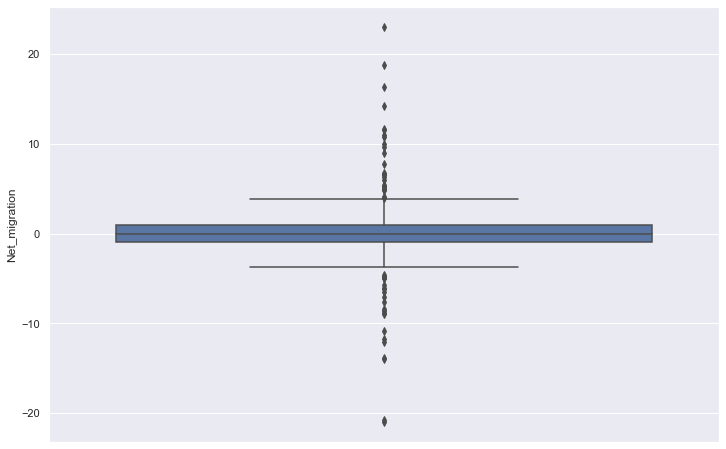

In [14]:
# Data visualization
# Box Plot
sns.boxplot(countries['Net_migration'], orient="vertical");


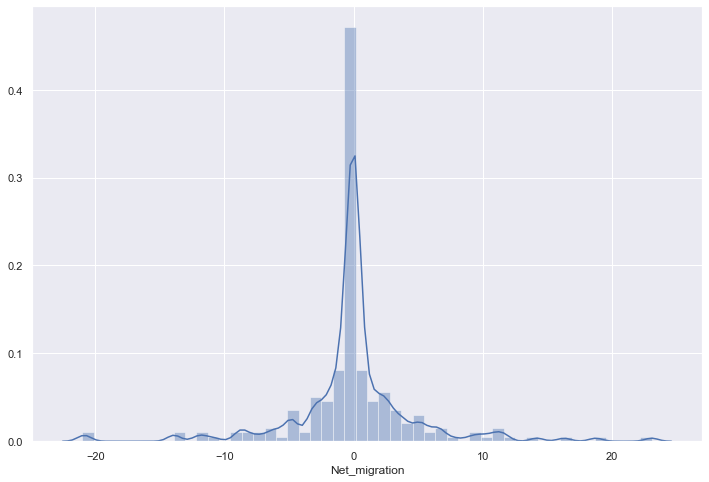

In [15]:
sns.distplot(countries['Net_migration'].dropna());

In [16]:
def q5():
    # Retorne aqui o resultado da questão 4.
    
    # First: Getting the IQR (interquartile range)
    Q1 = countries['Net_migration'].quantile(0.25) # Quartile 25%
    Q3 = countries['Net_migration'].quantile(0.75) # Quartile 75%
    IQR = Q3 - Q1  
    # Calculating the limits
    upper_boundary = Q3 + 1.5*IQR # Upper boundary 
    lower_boundary = Q1 - 1.5*IQR # Lower boundary
    
    # Applying the rule
    upper_outliers = [x for x in countries['Net_migration'] if x > upper_boundary]
    lower_outliers = [x for x in countries['Net_migration'] if x < lower_boundary]
    
    removing_outliers = False

    answer = tuple((len(lower_outliers), len(upper_outliers), removing_outliers))

    
    #pass
    return answer
q5()

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [17]:
# Loading the data
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroups = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

def q6():
    # Retorne aqui o resultado da questão 6.
    # Defining the count vectorizer
    count_vectorizer = CountVectorizer()
    newsgroups_counts = count_vectorizer.fit_transform(newsgroups.data) # Fitting and tranforming the data
    freq_phone = newsgroups_counts[:, count_vectorizer.vocabulary_.get('phone')].sum() # Calculating the sum of times that the
                                                                                       # word 'phone' appears
    answer = int(freq_phone)
    #pass
    return answer
q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [18]:
def q7():
    # Retorne aqui o resultado da questão 7.
    # Defining the Tfidf Vectorizer
    tfidf_vectorizer = TfidfVectorizer()
    newsgroups_tfidf = tfidf_vectorizer.fit_transform(newsgroups['data']) # Fitting and transforming
    freq_phone = newsgroups_tfidf[:, tfidf_vectorizer.vocabulary_['phone']].sum()
    answer = float(round(freq_phone,3))
    
    #pass
    return answer
q7()

8.888